# Predicting PSA Levels Using Clinical and Demographic Variables

**Objective:** \
To build and evaluate a linear regression model that predicts Prostate-Specific Antigen (PSA) levels in prostate cancer patients based on clinical features such as age, Gleason score, prostate volume, and biopsy results.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load and inspect the data

In [2]:
df = pd.read_csv("/Users/emudr/Desktop/data/prostate_psa_prediction.csv")

print("\n--- Basic Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe(include="all"))

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        300 non-null    float64
 1   gleason                    300 non-null    int64  
 2   prostate_volume            300 non-null    float64
 3   positive_cores             300 non-null    int64  
 4   biopsy_cancer              300 non-null    int64  
 5   family_history             300 non-null    int64  
 6   bmi                        300 non-null    float64
 7   psad                       300 non-null    float64
 8   race_black                 300 non-null    int64  
 9   race_hispanic              300 non-null    int64  
 10  race_white                 300 non-null    int64  
 11  clinical_stage_metastatic  300 non-null    int64  
 12  psa                        300 non-null    float64
dtypes: float64(5), int64(8)
memory

### Exploratory Data Analysis

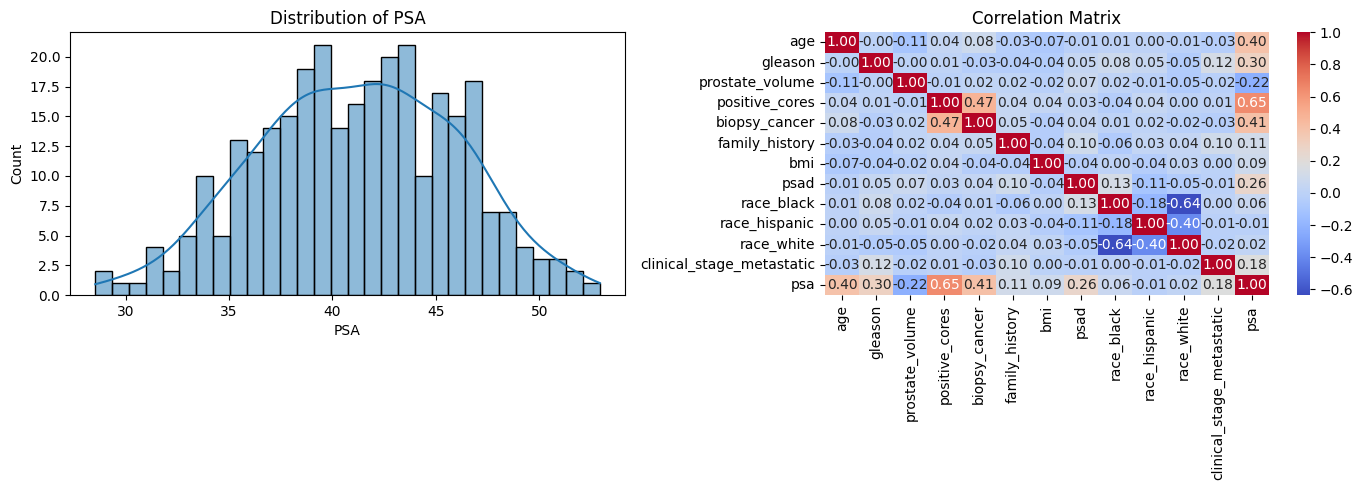

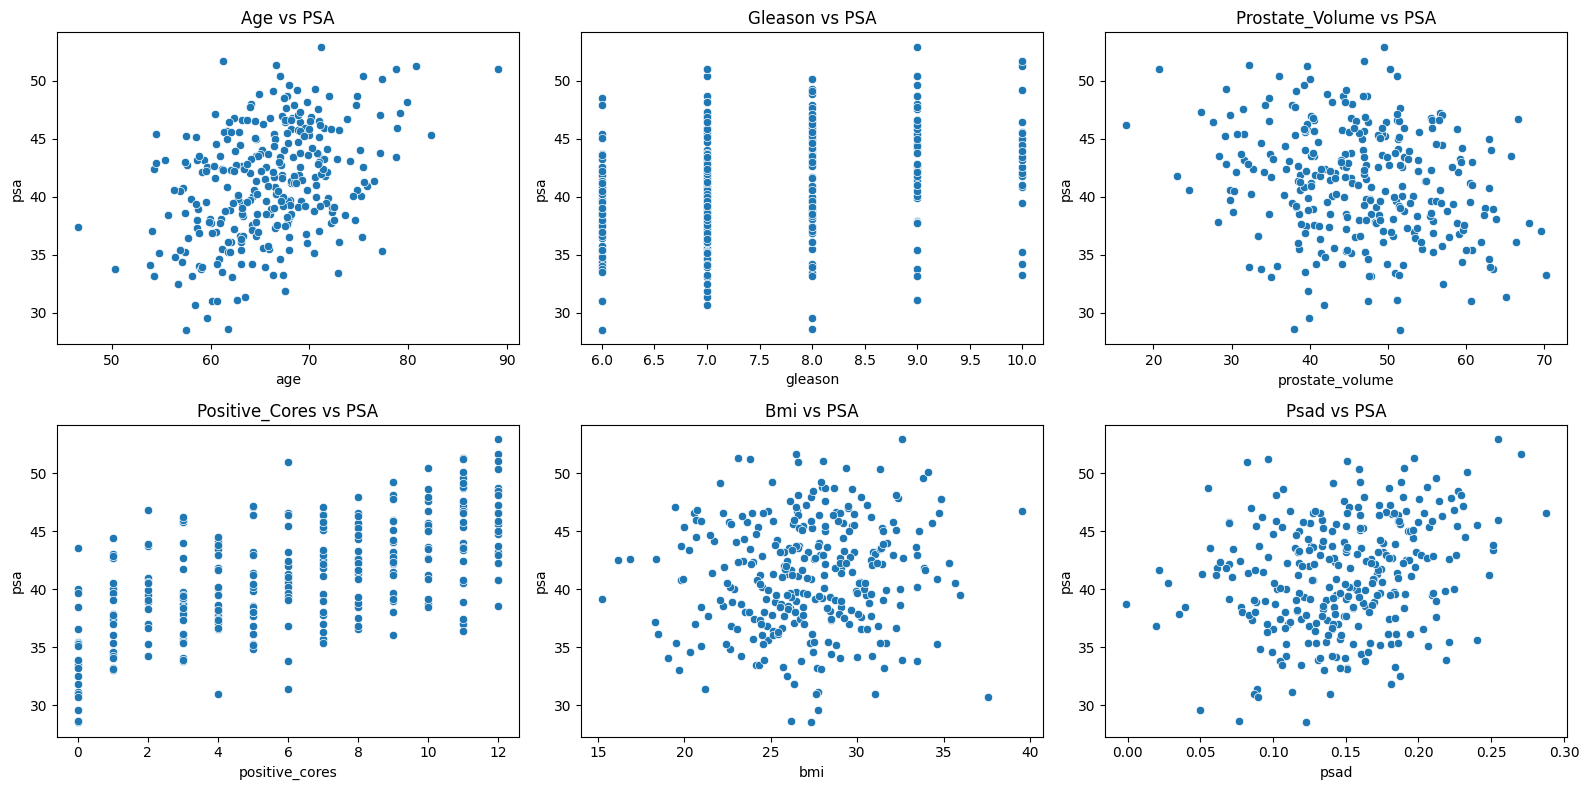

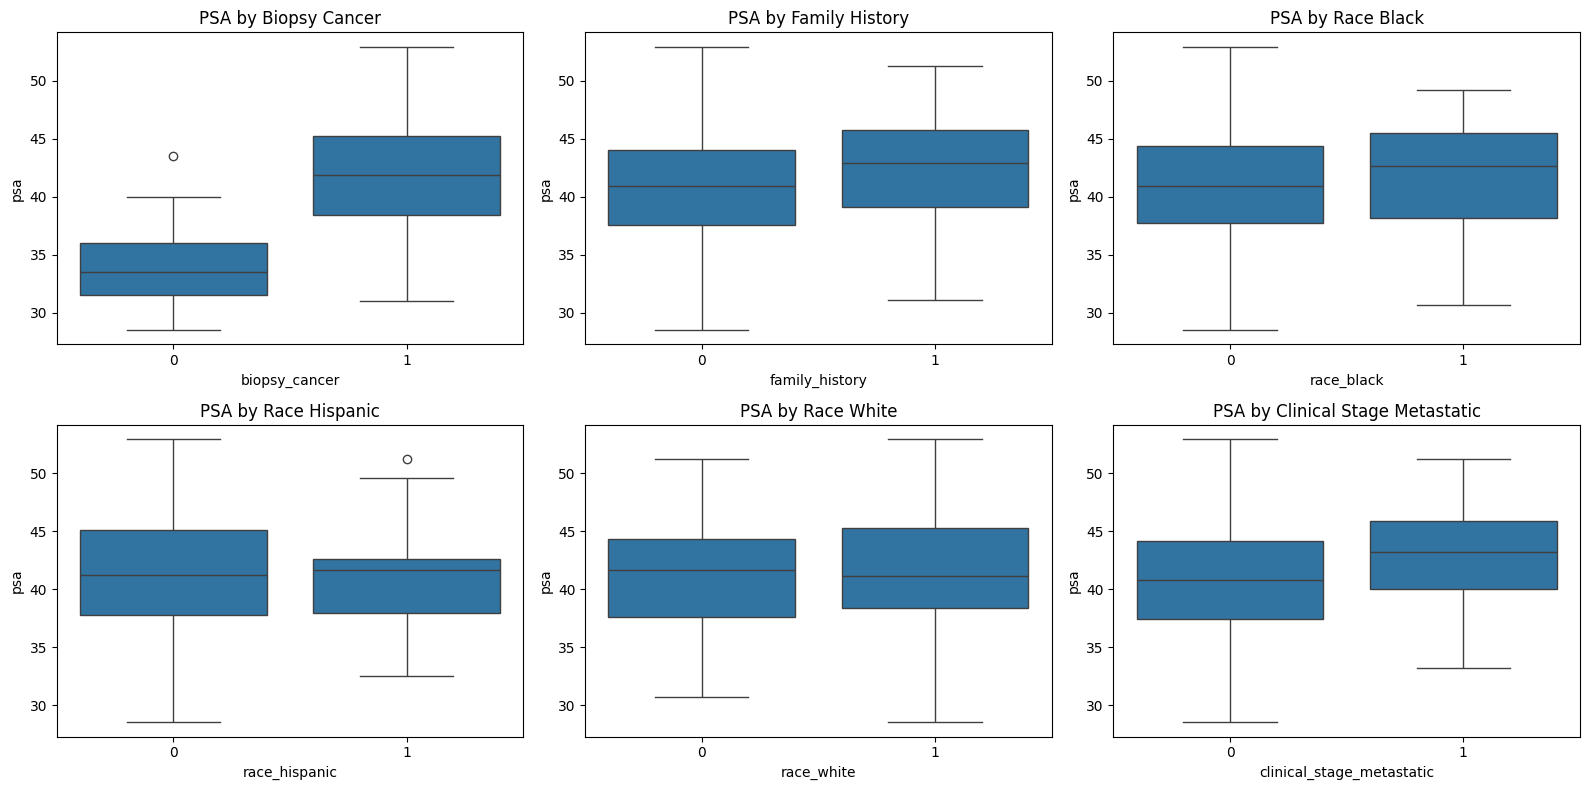

In [3]:
# Figure 1: Distribution of PSA + Correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["psa"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of PSA")
axes[0].set_xlabel("PSA")

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Matrix")

plt.tight_layout()
plt.show()

# Figure 2: Scatter plots - Numerical predictors vs PSA
numerical_cols = ['age', 'gleason', 'prostate_volume', 'positive_cores', 'bmi', 'psad']
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=col, y="psa", data=df, ax=axes[i])
    axes[i].set_title(f"{col.title()} vs PSA")

plt.tight_layout()
plt.show()

# Figure 3: Boxplots - Categorical predictors vs PSA
categorical_cols = ['biopsy_cancer', 'family_history', 'race_black', 'race_hispanic', 'race_white', 'clinical_stage_metastatic']
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y="psa", data=df, ax=axes[i])
    axes[i].set_title(f"PSA by {col.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()

### Linear Regression Modeling

In [4]:
# Separate predictors and target
X = df.drop(columns=["psa"])
y = df["psa"]

# Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n--- Variance Inflation Factors ---")
print(vif.sort_values(by="VIF", ascending=False))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\n--- Sklearn Model Performance ---")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

print("\n--- Coefficients ---")
print(pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False))

# Fit OLS model using statsmodels for inference
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print("\n--- Statsmodels Summary ---")
print(ols_model.summary())


--- Variance Inflation Factors ---
                      feature        VIF
0                         age  65.917352
1                     gleason  39.204436
6                         bmi  37.981249
2             prostate_volume  22.055509
4               biopsy_cancer  16.618652
7                        psad  10.593792
10                 race_white   7.329067
3              positive_cores   4.784787
8                  race_black   3.536114
9               race_hispanic   2.160726
5              family_history   1.379068
11  clinical_stage_metastatic   1.251725

--- Sklearn Model Performance ---
R²: 0.76
MSE: 5.37

--- Coefficients ---
psad                         24.281940
biopsy_cancer                 2.665922
clinical_stage_metastatic     1.641628
race_black                    1.481063
race_white                    1.340704
gleason                       1.176941
positive_cores                0.678820
race_hispanic                 0.605855
family_history                0.537380
age 

### Resiudal plot 

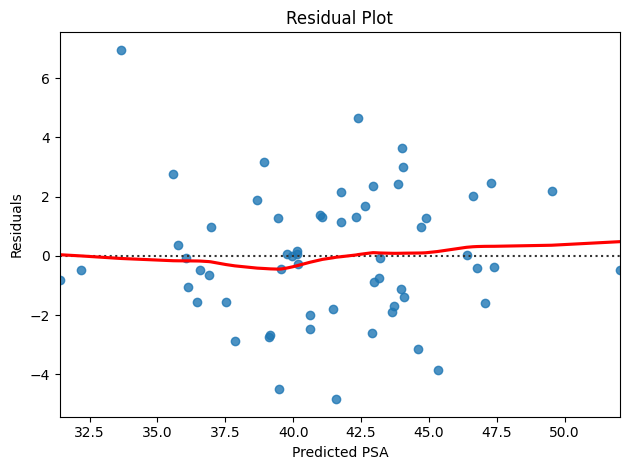

In [5]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted PSA")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

## 📈 Model Interpretation and Results 

#### 🎯 Objective
This analysis aims to predict PSA (Prostate-Specific Antigen) levels in men with prostate cancer using key clinical and demographic predictors via multiple linear regression.
<br>
<br>

#### 🔍 Model Performance
Metric	Value\
R² (Sklearn)	0.76\
MSE (Sklearn)	5.37\
R² (Statsmodels)	0.797\
Adj. R²	0.789\
F-statistic	94.18 (p < 0.0001)

**Interpretation:**
The model explains approximately 76–80% of the variance in PSA levels — a strong result for a biomedical regression model, suggesting the chosen predictors are highly relevant.
<br>
<br>

#### 📊 Top Predictors and Interpretations
**🔹 PSA Density (psad)**\
Coefficient: 23.79\
Interpretation: PSA density has the largest effect; a 0.1 unit increase in PSAD is associated with a 2.38 ng/mL increase in PSA, all else being equal.

**🔹 Positive Biopsy Cores (positive_cores)**\
Coefficient:** 0.70\
Interpretation:** For each additional positive biopsy core, PSA increases by 0.70 ng/mL.

**🔹 Gleason Score (gleason)**\
Coefficient: 1.10\
Interpretation: More aggressive tumors (higher Gleason scores) are associated with higher PSA.

**🔹 Clinical Stage (clinical_stage_metastatic)**\
Coefficient: 1.86\
Interpretation: Patients with metastatic prostate cancer have ~1.86 ng/mL higher PSA, on average.

**🔹 Prostate Volume**\
Coefficient: -0.095\
Interpretation: Larger prostate volume is associated with slightly lower PSA, possibly due to PSA dilution or benign growth.

**🔹 Race**\
Coefficients:\
Black: 1.62\
White: 1.46\
Interpretation: Black and White individuals had significantly higher PSA levels than Hispanic individuals, even when controlling for clinical factors. This suggests potential disparities or biological differences warranting further investigation.
<br>
<br>

#### ⚠️ Multicollinearity 
Feature	VIF\
Age	65.92\
Gleason	39.20\
BMI	37.98\
Prostate Volume	22.06\
Biopsy Cancer	16.62\
PSAD	10.59\

**Interpretation:** Many features show high Variance Inflation Factors (VIF > 10), indicating multicollinearity.\
**Implication:** While the model fit is good, coefficients may be unstable or less interpretable. Consider removing or combining variables (e.g., PSAD is derived from PSA and volume) in future modeling.
<br>
<br>

#### 📉 Residual Analysis
Residuals were symmetrically distributed with no major skew or outliers.\
Durbin-Watson statistic ~1.96 indicates no strong autocorrelation.\
Homoscedasticity and linearity assumptions appear valid.
<br>
<br>

#### ✅ Conclusion
This linear regression model effectively predicts PSA levels using a combination of tumor characteristics, demographics, and diagnostic data.

Key takeaways:\
PSAD, tumor burden, and metastasis are strong predictors of PSA.\
There is evidence of racial disparities in PSA after adjusting for clinical features.\
Multicollinearity should be addressed before using this model for inference or clinical decision-making.

